## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Módulo 3/rrhh.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
#Hacemos el EDA para conocer la data mejor
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
data.describe()

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


Text(0, 0.5, 'Frecuencia')

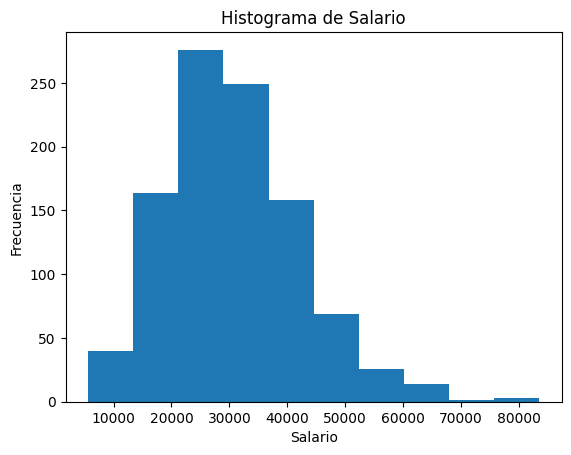

In [ ]:
#Hacemos un histograma, diagrama de dispersión y un diagrama de caja del salario para tener una idea visual del comportamiento de los datos
plt.hist(data['Salario'])
plt.title('Histograma de Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')


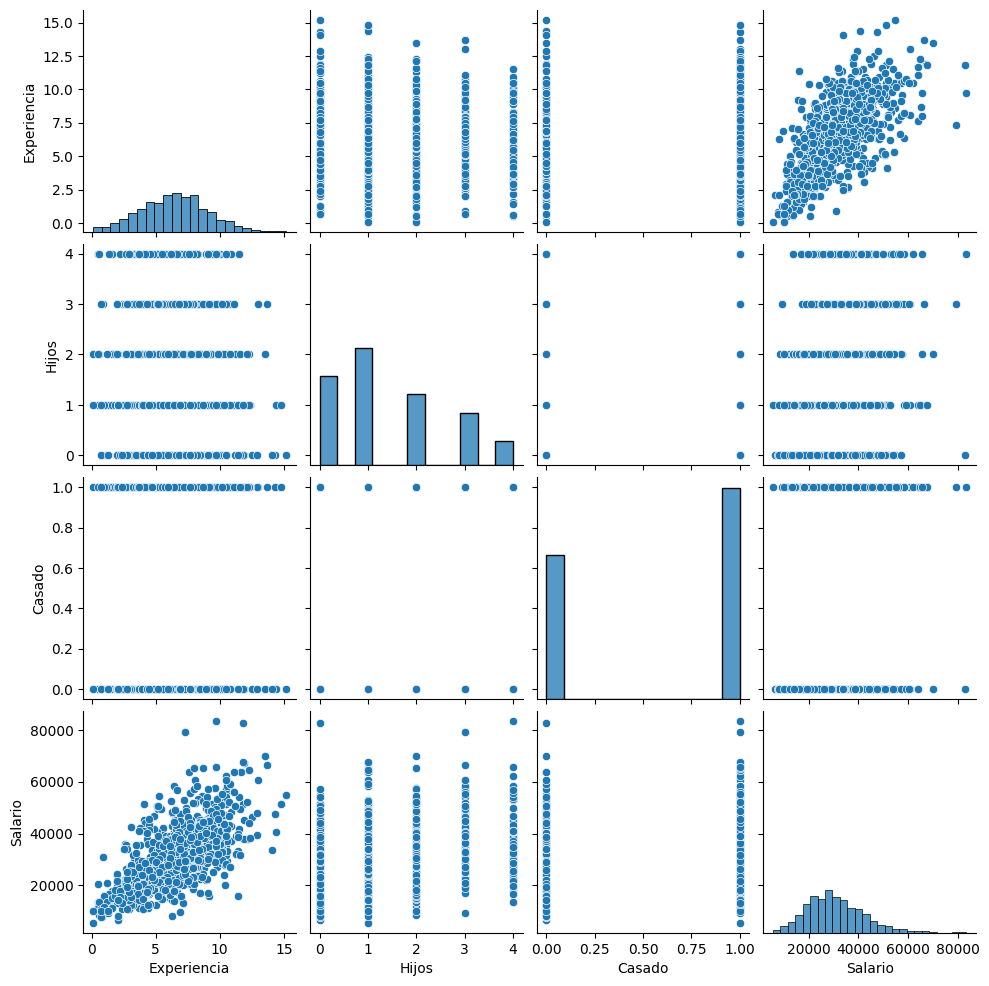

In [ ]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Diagrama de Caja de Salario')

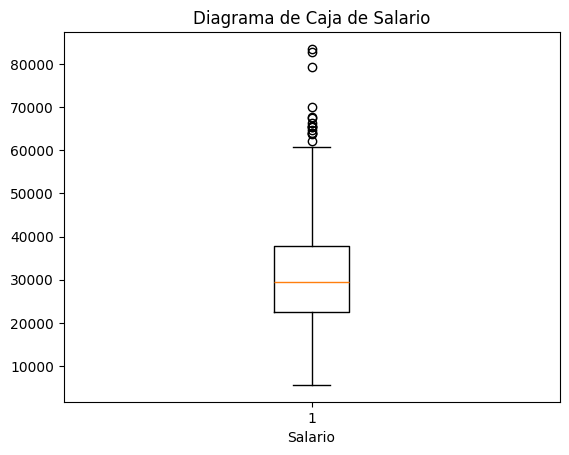

In [ ]:
plt.boxplot(data['Salario'])
plt.xlabel('Salario')
plt.title('Diagrama de Caja de Salario')

In [ ]:
#Usamos Dummies para variables categóricas "Posicion" y "Educacion"
data = pd.get_dummies(data, columns=['Posicion', 'Educacion'])
data.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,True,False,False,True,False,False
1,5.6,2,0,31240,True,False,False,False,True,False
2,11.7,1,0,63880,True,False,False,False,True,False
3,5.2,2,1,29960,True,False,False,False,True,False
4,7.2,2,1,34710,False,True,False,False,True,False


In [ ]:
#Separamos las variables para Train y Test
from sklearn.model_selection import train_test_split

y= data['Salario']
X= data.drop('Salario', axis=1)

#Separación 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Escalamos las variables
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train[['Experiencia','Hijos']])
X_test_escalado = escalador.transform(X_test[['Experiencia','Hijos']])

In [ ]:
#mostramos estadística descriptiva de las variables escaladas para validar el escalado
#comprovamos que media es muy cercana a cero y desviación estándar casi 1
print("Estadísticas descriptivas de X_train_escalado:")
print(pd.DataFrame(X_train_escalado).describe())

print("\nEstadísticas descriptivas de X_test_escalado:")
print(pd.DataFrame(X_test_escalado).describe())


Estadísticas descriptivas de X_train_escalado:
                  0             1
count  8.000000e+02  8.000000e+02
mean   1.598721e-16  6.217249e-17
std    1.000626e+00  1.000626e+00
min   -2.432287e+00 -1.188861e+00
25%   -6.680580e-01 -1.188861e+00
50%    2.229257e-02 -3.696631e-01
75%    6.359375e-01  4.495349e-01
max    3.358987e+00  2.087931e+00

Estadísticas descriptivas de X_test_escalado:
                0           1
count  200.000000  200.000000
mean    -0.049235    0.007168
std      0.940271    0.950102
min     -2.278876   -1.188861
25%     -0.706411   -0.369663
50%     -0.035237   -0.369663
75%      0.559232    0.449535
max      3.013812    2.087931


In [ ]:
#Aunque la estadística descriptiva confirma el escalado de los datos, por su media cercana a cero y desv. estándar cercana a 1, se procederá a
#entrenar el modelo con las variables sin escalar. La razón principal es porque se hizo el entrenamiento con las variables escaladas y el
# R2 obtenido fue de 0.495. Mientras que al entrenar el modelo con las variables sin escalar el R2 es de 0.65.
#Ese resultado tiene sentido, dado que las variables escaladas no difieren ampliamente en la mafnitud de sus valores, con lo cual puede prescindirse del escalado.

#Entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Probamos el modelo haciendo predicciones del conjunto de prueba
y_pred = modelo.predict(X_test)
y_pred

array([31439.42632652, 49808.22324639, 26084.67749541, 21919.4046551 ,
       28756.78472968, 33830.41780883, 17179.86081016, 29272.95042607,
       26382.04649311, 44902.4716312 , 41164.05532233, 28081.92629606,
       23721.97875955, 30698.03509459, 22214.66678029, 29436.25845867,
       30840.4745861 , 23129.34763667, 25126.03770401, 29518.48576941,
       32112.57943797, 25706.62932618, 27790.3191826 , 43185.42612547,
       22516.24952302, 32110.47256546, 21027.297662  , 40354.17563997,
       23327.67734459, 33353.88908312, 38509.74947301, 14718.12278451,
       33816.27143561, 21159.65330492, 38889.90451475, 35817.17524798,
       34710.48530122, 38720.67741494, 24611.97888014, 50322.28207026,
       23329.7842171 , 27193.47431468, 24893.0946321 , 36493.35365156,
       25506.19274575, 29277.1641711 , 49806.87164796, 28678.21243067,
       15676.76257592, 35005.74742641, 30243.62971818, 23920.30846747,
       28690.81066468, 32928.37818754, 29058.36747241, 20948.72536299,
      

In [ ]:
#Aplicamos métricas de evaluación al modelo

#MSE
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

#RMSE
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

#R2
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 35606817.914109915
Raíz del Error Cuadrático Medio (RMSE): 5967.144871218556
Coeficiente de Determinación (R^2): 0.6509821573169725


## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
data_log= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Módulo 3/rrhh_2.csv')
data_log.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
#EDA
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
data_log.describe(include="all")

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
count,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000
unique,NaN,3,NaN,NaN,3,NaN,NaN
top,NaN,Analista,NaN,NaN,Bachillerato,NaN,NaN
freq,NaN,790,NaN,NaN,531,NaN,NaN
mean,6.416200,NaN,1.453000,0.595000,NaN,30787.060000,0.518000
std,2.577612,NaN,1.208823,0.491138,NaN,11520.200049,0.499926
min,0.100000,NaN,0.000000,0.000000,NaN,5630.000000,0.000000
25%,4.600000,NaN,0.000000,0.000000,NaN,22557.500000,0.000000
50%,6.400000,NaN,1.000000,1.000000,NaN,29470.000000,1.000000
75%,8.100000,NaN,2.000000,1.000000,NaN,37922.500000,1.000000


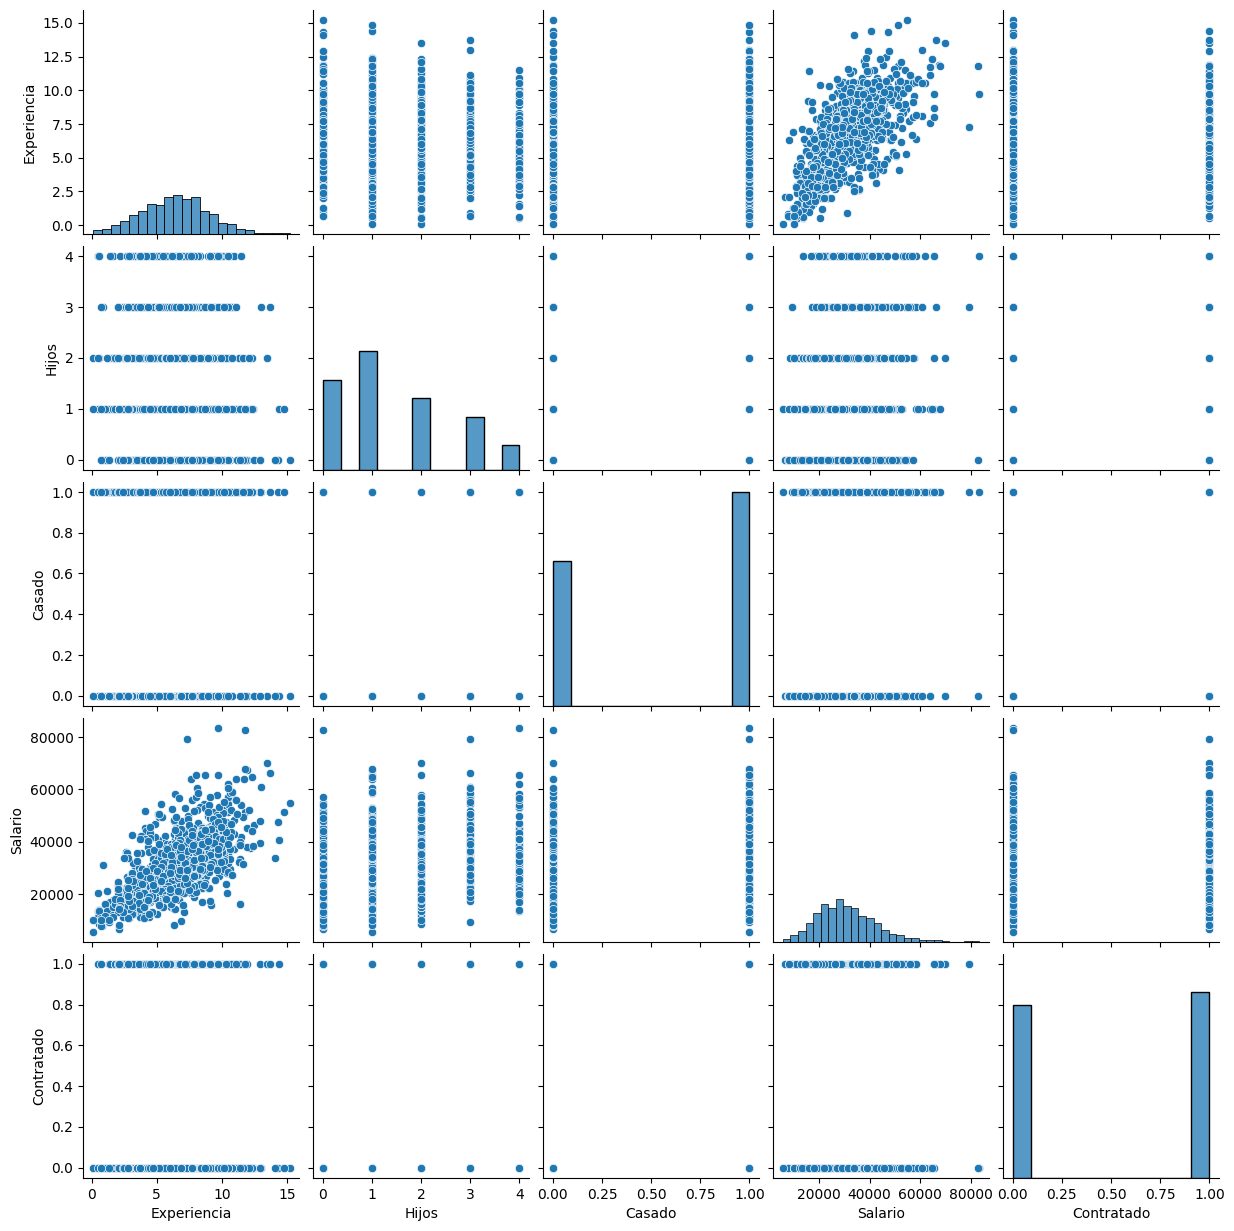

In [ ]:
sns.pairplot(data_log)

In [ ]:
#Validamos el balanceo de clases en la variable dependiente, para conocer si hay más datos de alguna de los valores de "Contratado"
data_log["Contratado"].value_counts()

,count
Contratado,
1,518
0,482


In [ ]:
data_log["Educacion"].value_counts()

,count
Educacion,
Bachillerato,531
Licenciatura,369
Posgrado,100


In [ ]:
data_log["Posicion"].value_counts()

,count
Posicion,
Analista,790
Coordinador,151
Gerente,59


In [ ]:
#Habiendo revisado las variables categóricas, procedemos a usar "Dummies" para ellas y sustituirlas en el dataframe
data_log= pd.get_dummies(data_log, columns=["Posicion", "Educacion"])
data_log.head()

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,True,False,False,True,False,False
1,5.6,2,0,31240,0,True,False,False,False,True,False
2,11.7,1,0,63880,0,True,False,False,False,True,False
3,5.2,2,1,29960,1,True,False,False,False,True,False
4,7.2,2,1,34710,1,False,True,False,False,True,False


In [ ]:
#Separamos las variables Train - Test

y= data_log["Contratado"]
X = data_log.drop("Contratado", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Aunque en la regresión lineal no fue necesario el escalamiento, procederemos a escalar las variables para validar c+omo resulta el accuracy y la precisión
# Posteriormente entrenaremos el modelo sin los datos escalados y nos quedaremos con el que presenta maejor performance, dado que las variales escaladas
# mismas. Se comprobí que con las variables escaladas el accuracy era de 0.59 y la precisión de 0.592; mientras que con las variables sin
# escalar el resultado es 0.71 y 0.70, respectivamente. Evidenciando un mejor performance del modelo sin escalar.
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train[['Experiencia','Hijos']])
X_test_escalado = escalador.transform(X_test[['Experiencia','Hijos']])

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_logreg = LogisticRegression(max_iter=5000)
modelo_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
#Predecimos la variable dependiente del modelo
y_pred = modelo_logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0])

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[66, 32],
       [26, 76]])

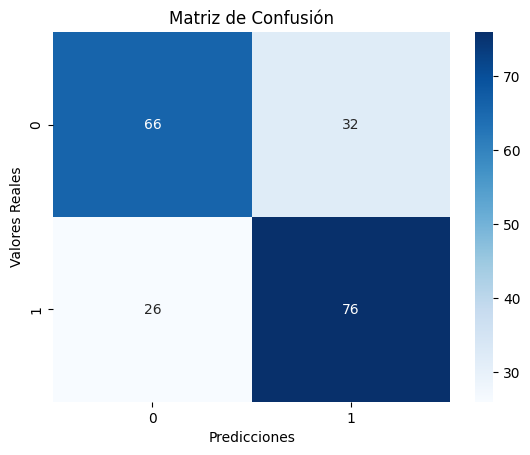

In [ ]:
#Graficamos la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [ ]:
exactitud = accuracy_score(y_test, y_pred)
print ("exactitud = ", exactitud)
precisión = precision_score(y_test, y_pred)
print ("precisión = ", precisión)

exactitud =  0.71
precisión =  0.7037037037037037


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69        98
           1       0.70      0.75      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

